In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.shape

(1000, 8)

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
np.random.seed(42)
cols = ['math score', 'reading score', 'writing score']

for col in cols:
    idx = np.random.choice(df.index, size=np.random.randint(50, 71), replace=False)
    df.loc[idx, col] = np.nan

print(df.isnull().sum())

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     56
reading score                  61
writing score                  60
dtype: int64


In [17]:
for col in cols:
    df[col] = df[col].fillna(df[col].median())

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [18]:
df[cols].skew()

math score      -0.160037
reading score   -0.280766
writing score   -0.317710
dtype: float64

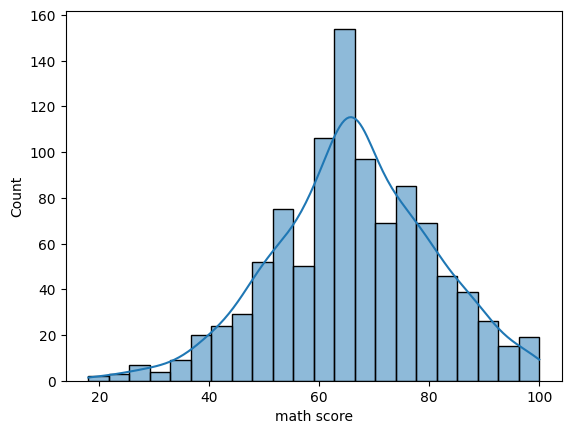

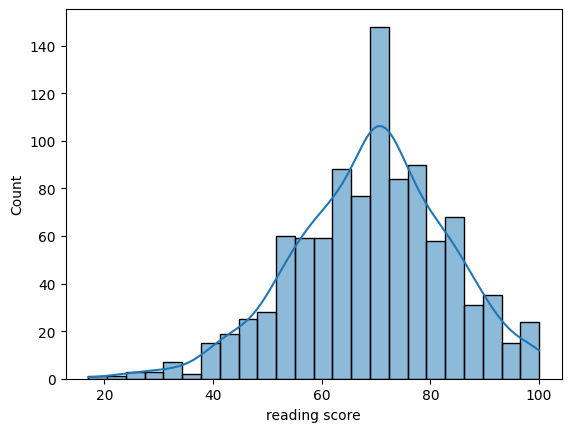

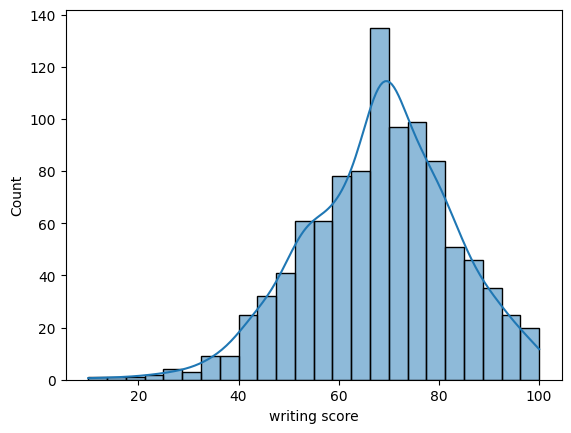

In [28]:
sns.histplot(data=df , x = 'math score', kde=True)
plt.show()
sns.histplot(data=df , x = 'reading score', kde=True)
plt.show()
sns.histplot(data=df , x = 'writing score', kde=True)
plt.show()

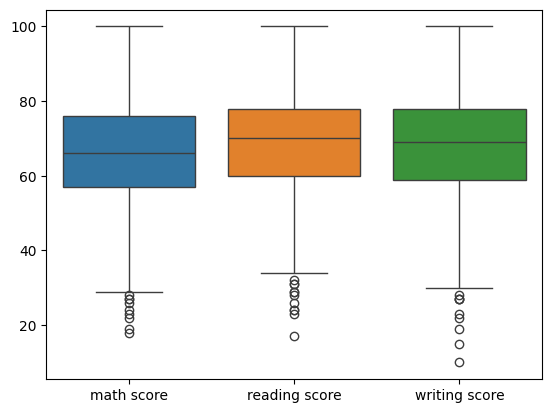

In [32]:
sns.boxplot(df[cols])
plt.show()

In [40]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1
# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to keep only non-outliers
df = df[(df['math score'] >= lower_bound) & (df['math score'] <= upper_bound)]

In [36]:
from scipy.stats import zscore
df['z_score'] = zscore(df['math score'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]

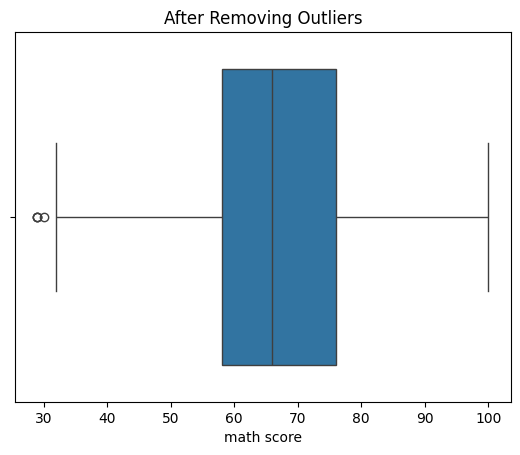

In [39]:
sns.boxplot(x=df['math score'])  # After outliers removal
plt.title('After Removing Outliers')
plt.show()

In [41]:
df['math score'].skew()

0.043018046526357955

In [43]:
df['writing score'].skew()

-0.2037922683024003

In [45]:
df['reading score'].skew()

-0.17844289002227787

In [46]:
from scipy.stats import zscore
df['z_score'] = zscore(df['writing score'])
outliers = df[(df['z_score'] > 3) & (df['z_score'] < -3)]

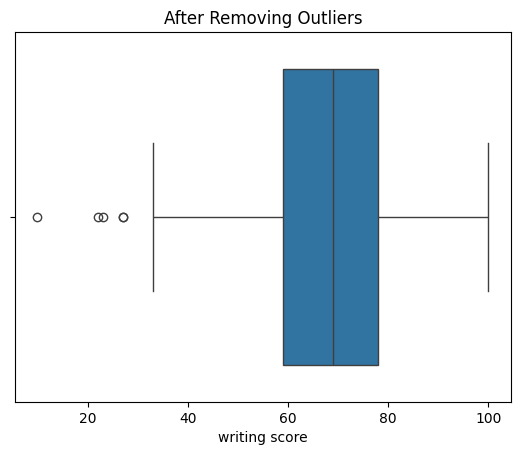

In [48]:
sns.boxplot(x=df['writing score'])  # After outliers removal
plt.title('After Removing Outliers')
plt.show()

Skewness before transformation: 0.043018046526357955


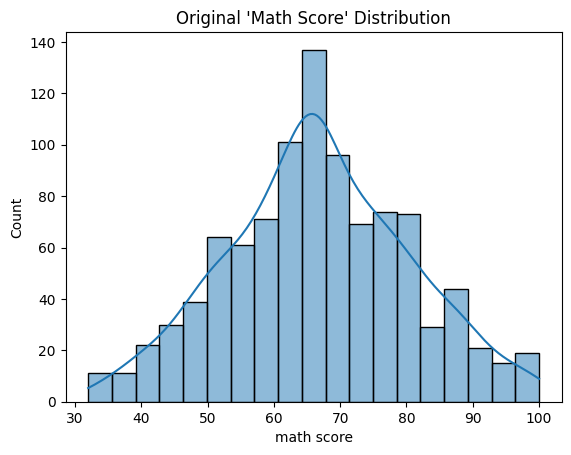

Skewness after transformation: -0.5347637997633723


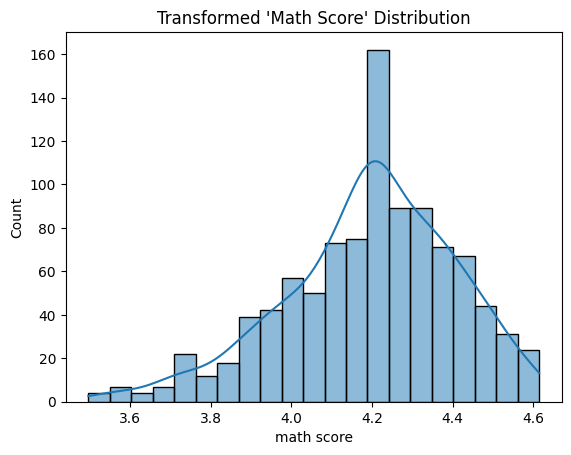

In [49]:
# Check skewness before transformation
print("Skewness before transformation:", df['math score'].skew())

# Visualize the original distribution
sns.histplot(df['math score'], kde=True)
plt.title("Original 'Math Score' Distribution")
plt.show()

# Apply log transformation to reduce skewness
df['math score'] = np.log1p(df['math score'])  # log1p to avoid issues with log(0)

# Check skewness after transformation
print("Skewness after transformation:", df['math score'].skew())

# Visualize the distribution after log transformation
sns.histplot(df['math score'], kde=True)
plt.title("Transformed 'Math Score' Distribution")
plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['writing score']])

In [55]:
mean_values = df_scaled.mean(axis=0)
std_values = df_scaled.std(axis=0)

print(f"Mean values after standardization:\n{mean_values}")
print(f"Standard deviation values after standardization:\n{std_values}")

Mean values after standardization:
[-2.55565016e-16]
Standard deviation values after standardization:
[1.]
